# Continuous Control Results Example

### batch-norm:True

In [2]:
%run -i train.py

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
-------- Model structure --------
info : reset weights: True, noise type: OU
-------- Actor --------
Actor(
  (batchnorm_input): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm_layers): ModuleList(
    (0): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (hidden_layers): ModuleList(
    (0): Linear(in_features=33, out_features=256, bias=False)
    (1): Linear(in_features=256, out_features=128, bias=False)
  )
  (output): Linear(in_features=128, out_features=4, bias=True)
  (dropout): Dropout(p=0)
)
-------- Critic -------
Critic(
  (bn0): BatchNorm1d(33, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fcs1)

### batch-norm:False

In [2]:
%run -i train.py

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
-------- Model structure --------
info : reset weights: True, noise type: OU
-------- Actor --------
Actor(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=33, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=4, bias=True)
  (dropout): Dropout(p=0)
)
-------- Critic -------
Critic(
  (fcs1): Linear(in_features=33, out_features=256, bias=True)
  (fcs2): Linear(in_features=260, out_features=128, bias=True)
  (fcs3): Linear(in_features=128, out_features=1, bias=True)
)
---------------------------------
Interacting with env ...
Episode 100	Average Score: 9.77
Episode 193	Average Score: 30.06
Environment solved in 93 episodes!	Average Score: 30.06
Episode 194	Average Score: 30.21
Average Score: 30.21
Episode 195	Average Score: 30.36
Average Score: 30.36
Episode 196	Average Score: 30.51

----

## Summary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 10

%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
f = open("scores/scores_ddpg.txt","rb")
scores1 = pickle.load(f)

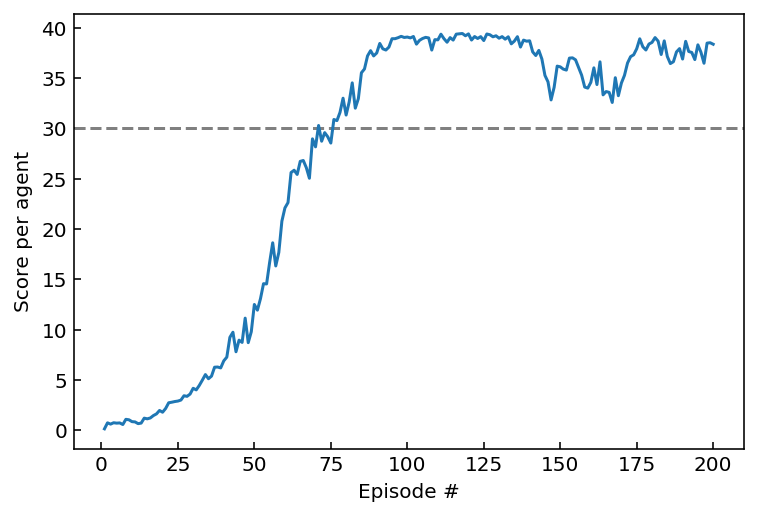

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(y=30,linestyle='--', color='gray')
plt.plot(np.arange(1, len(scores1)+1), scores1)
plt.ylabel('Score per agent')
plt.xlabel('Episode #')
plt.savefig("DDPG.png", transparent=True, dpi=300)

In [5]:
f = open("scores/scores_ddpg_nobn.txt","rb")
scores2 = pickle.load(f)

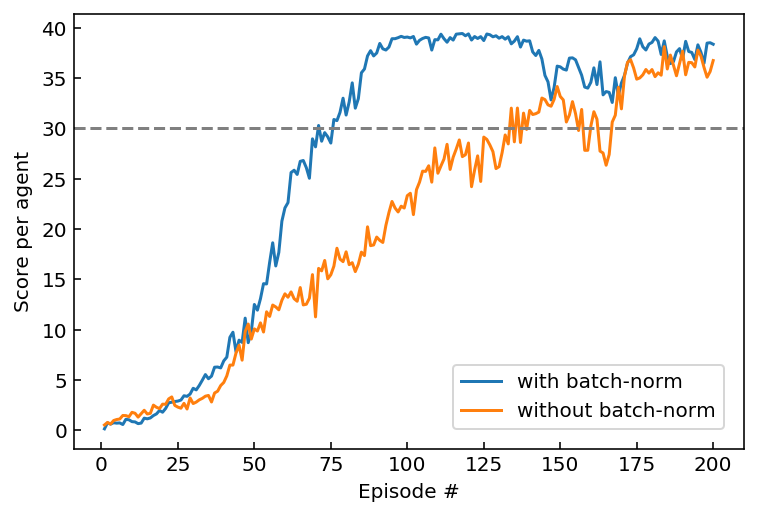

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores1)+1), scores1, label="with batch-norm")
plt.plot(np.arange(1, len(scores2)+1), scores2, label="without batch-norm")
ax.axhline(y=30,linestyle='--', color='gray')
plt.ylabel('Score per agent')
plt.xlabel('Episode #')
plt.legend(borderaxespad=1)
plt.savefig("DDPG_bn.png", transparent=True, dpi=300)

---

## cf. Noise

In [1]:
from noise import NormalNoise, OUNoise

In [2]:
noise1 = NormalNoise(size=4, seed=0, sigma=0.2)
noise2 = OUNoise(size=4, seed=0, mu=0., theta=0.15, sigma=0.2)

In [3]:
noise_box1=[]
noise_box2=[]
noise2.reset()
for _ in range(20):
    noise_box1.append(noise1.sample())
    noise_box2.append(noise2.sample())

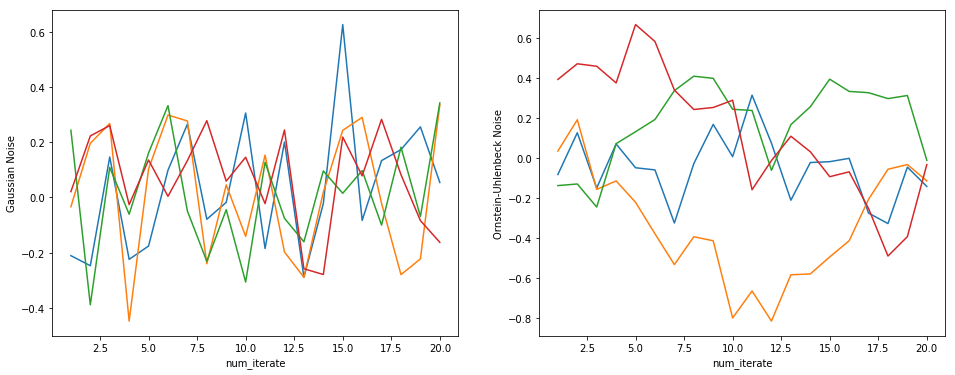

In [5]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
plt.plot(np.arange(1, len(noise_box1)+1), noise_box1)
plt.ylabel('Gaussian Noise')
plt.xlabel('num_iterate')
ax = fig.add_subplot(122)
plt.plot(np.arange(1, len(noise_box2)+1), noise_box2)
plt.ylabel('Ornstein-Uhlenbeck Noise')
plt.xlabel('num_iterate')
plt.show()